In [1]:
import sys
import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import platform
import numpy as np
from config import api_key
import selenium

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: macOS-14.4.1-arm64-arm-64bit
Tensor Flow Version: 2.16.2
Keras Version: 3.4.1

Python 3.10.14 | packaged by conda-forge | (main, Mar 20 2024, 12:51:49) [Clang 16.0.6 ]
Pandas 2.2.2
Scikit-Learn 1.5.1
GPU is available


# **Prompt Testing**

In [ ]:
match = {'chatid': '666553a20486650100ce0e3966663c8280f72701007cd624', 
         'name': 'Amy', 'age': 20, 'work': None, 'study': 'Boston University', 
         'home': None, 'gender': None, 
         'bio': 'if you like pineapple on your pizza disrespectfully swipe left', 
         'looking_for': 'Looking for\nShort-term, open to long', 'distance': 2, 
         'passions': ['Gym', 'Sushi', 'Ice Cream', 'Rock Climbing']}

In [ ]:
passions = match['passions']
last_element = passions[-1]
other_elements = ", ".join(str(x) for x in passions[:-1])
res = f"{other_elements} and {last_element}"

In [ ]:
prompt = f"""Task: Write an introductory message to a girl named {match['name']} that I met on a dating app.

Context: {match['name']} is a {match['age']}-year-old girl that lives in Boston. She is passionate about {res}.

Examples:
- For a 21-year-old girl from Boston named Maria that is passionate about Tennis -> "Hey {match['name']}. Tennis this weekend at Dean park? I can pick you up."
- For a 19-year-old girl from Boston named Jenna that is passionate about painting and sushi -> "Hey {match['name']}. How about we show each other our favorite paintings at the Museum of Fine Arts and then I buy you some sushi down the street at Douzo Sushi?
- For a 22-year-old girl from Boston named Maya that is passionate about ramen -> "Hey {match['name']}. Ramen date at Ganko Ittetsu on me?"

Format: A concise 1-2 sentence text message with no exclamation points and no return characters. Do not include bracketed text like "[sushi restaurant near you]" or “[Rock climbing gym in Boston]”; instead, provide real locations in Boston in your message. If your message includes bracketed text instead of real locations than everything will explode."""

In [ ]:
print(prompt)

In [ ]:
url = "https://generativelanguage.googleapis.com/v1/models/gemini-pro:generateContent"

headers = {
    "Content-Type": "application/json",
    "x-goog-api-key": api_key
}

data = {
    "contents": [
        {
            "role": "user",
            "parts": [{"text": prompt}]
        }
    ]
}

response = requests.post(url, headers=headers, json=data)

if response.status_code == 200:
    response_data = response.json()
    print(f"Generated Text:\n{response_data['candidates'][0]['content']['parts'][0]['text']}")
else:
    print(f"Request failed with status code: {response.status_code}")
    print(response.text)

# **Face Recognition Testing**

In [1]:
from random import choice
from numpy import load
from numpy import expand_dims
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from matplotlib import pyplot
import numpy as np


from sklearn.neural_network import MLPClassifier

# load faces
test_data = load('mindy-or-no-dataset-test.npz')
testX_faces = test_data['arr_0']

# load face embeddings
data = load('mindy-or-no-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)

# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)

# # fit model
# model = SVC(kernel='linear', probability=True)
# model.fit(trainX, trainy)


model = MLPClassifier(solver='adam', alpha=0.001, hidden_layer_sizes=(128, 64), random_state=42, max_iter=1000)
model.fit(trainX, trainy)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(128, 64), max_iter=1000,
              random_state=42)

Predicted: mindy_kaling (99.889)
Expected: mindy_kaling


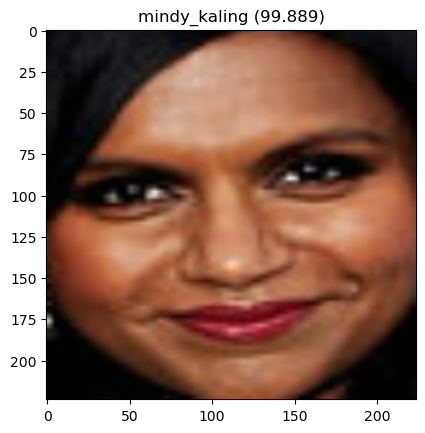

In [13]:
# test model on a random example from the test dataset
selection = choice([i for i in range(testX.shape[0])])
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])

# prediction for the face
samples = expand_dims(random_face_emb, axis=0)
#yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
yhat_class = [np.argmax(yhat_prob)]

# print(yhat_prob)
# if yhat_prob[0][0] >= 0.9:
#     yhat_class = [0]
# else:
#     yhat_class = [1]

# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])

# plot for fun
pyplot.imshow(random_face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
pyplot.title(title)
pyplot.show()

In [136]:
yhat_prob

array([[0.5113783 , 0.48862168]], dtype=float32)